# Welcome to the Titanic Survival Prediction Notebook!



## The Titanic Sinking Disaster:
The sinking of Titanic was one of the deadliest maritime disaster in history. The RMS Titanic with an estimated 2,224 people onboard sank 15 April 1912 in North Atlantic Ocean, resulting in death of more than 1,500 people. The disaster called for major changes in maritime regulations to implement new safety measures for example preparation of excess lifeboats and establishment of International Ice Patrol. 

## The Dataset
The number of casualties of the sinking was reported by newspapers at the time. The British Board of Trade has reported the finalised number of casuality. Kaggle has further prepared the dataset in tabular format to host a competition in prediction model. 

https://www.kaggle.com/competitions/titanic/data

While the competition rewards high prediction accuracy, this notebook also aims to understand the titanic story more in a data science way :) 


Below is the dataset description (courtesy of the Kaggle team):

### Data Dictionary

| **Variable** | **Definition**                             | **Key **                                       |
|--------------|--------------------------------------------|------------------------------------------------|
| survival     | Survival                                   | 0 = No, 1 = Yes                                |
| pclass       | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex          | Sex                                        |                                                |
| Age          | Age in years                               |                                                |
| sibsp        | # of siblings / spouses aboard the Titanic |                                                |
| parch        | # of parents / children aboard the Titanic |                                                |
| ticket       | Ticket number                              |                                                |
| fare         | Passenger fare                             |                                                |
| cabin        | Cabin number                               |                                                |
| embarked     | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |



### Variable Notes:

Pclass: A proxy for socio-economic status (SES)

    1st = Upper
    2nd = Middle
    3rd = Lower

Age: <BR>
    <t>Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

Sibsp: The dataset defines family relations in this way:

&ensp;Sibling = brother, sister, stepbrother, stepsister<br>
&ensp;Spouse = husband, wife (mistresses and fiancés were ignored)

Parch: The dataset defines family relations in this way:

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.
        
### What's new in version 4?
        
major changes: 
- Introduction: Brief introduction to the Titanic disaster 
- Introduction: Information about the dataset
- Workflow overview: added a overview workflow section to guide readers
- EDA(inspect the dataset): added barplot to compare count of survived and loss passengers
- EDA(inspect the dataset): added lineplot of survival/loss count vs family members
- Feature engineering and selection: feature selection with correlation matrix

minor changes
- fixed the numbers of each section



## Workflow of this notebook

1. import dataset and python modules
2. exploratory data analysis<br>
    2.1 inspect the dataset<br>
    2.2 explore the features
3. feature engineering and selection
4. declare features and targets for models
5. train "test" split
6. models<br>
    6.1 random forest<br>
    6.2 xgboost
7. model optimization 
8. exporting prediction
9. conclusion

## 1. import dataset and modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# uncomment this block to run on kaggle
'''
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)


raw_dataset = pd.read_csv(path)
'''

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        path = os.path.join(dirname, filename)\n\n\nraw_dataset = pd.read_csv(path)\n"

In [4]:
# uncomment this block to run locally
train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')

## 2. Exploratory Data Analysis

### 2.1 Inspecting the dataset

In [5]:
 train_raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_raw.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# preprocessing decision:

# replace null age with average
# only first class has cabin 
# drop cabin

In [10]:
# suvivior/casualty breakdown
train_raw['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

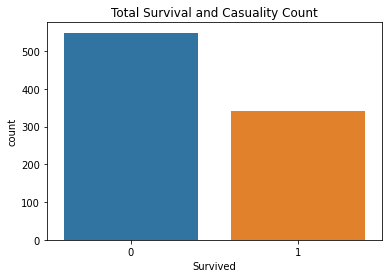

In [11]:
ax = sns.countplot(x='Survived', data=train_raw).set(title = 'Total Survival and Casuality Count')

In [12]:
# percentage of death in total passengers 
341/(549+341)

0.3831460674157303

## 2.2 Explore features

In [13]:
# explore pclass
train_raw['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [14]:
# explore names

# explore titles
names = train_raw['Name']
title_col = []
for name in names:
    t = name.split(sep=',')[1]
    t = t[1:]
    t = t[0:t.find('.')]
    title_col.append(t)

unique_titles = list(set(title_col))
unique_titles

['Sir',
 'Lady',
 'Jonkheer',
 'Mrs',
 'Ms',
 'Major',
 'Mlle',
 'Miss',
 'Dr',
 'Capt',
 'Master',
 'Rev',
 'the Countess',
 'Mme',
 'Mr',
 'Don',
 'Col']

In [15]:
# explore titles

train = train_raw.copy()
train['Title'] = title_col
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


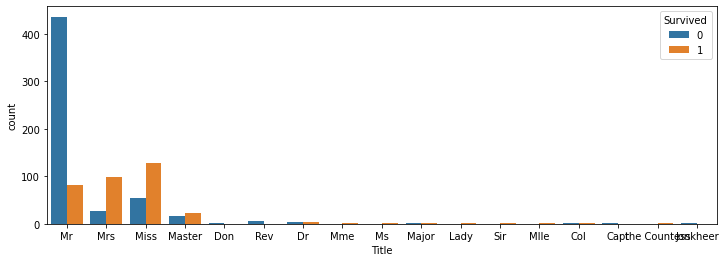

In [16]:
plt.figure(figsize=(12,4))
sns.countplot(x='Title', data=train,hue='Survived')
plt.show()
# the majority is Mr, Mrs, Miss and Master 
# The rest will be pooled into a "rare category. 

<AxesSubplot:xlabel='Age', ylabel='Count'>

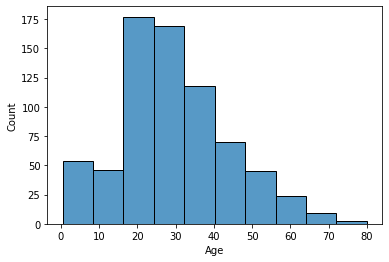

In [17]:
# explore age distribution
train_1 = train.copy()
train_1
train_1.dropna(axis=1)
sns.histplot(data=train_1,x=train_1['Age'], bins=10)

In [18]:
# 177 observations with missing values in Age were dropped. 
# the distribution of age is bell shaped but skewed to right
# use mean to replace the missing values in age

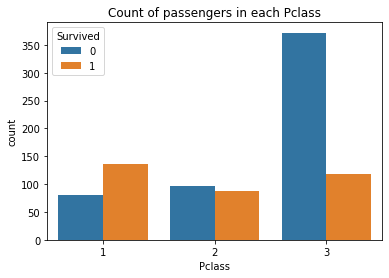

In [19]:
# breakdown pclass
sns.countplot(x='Pclass',data=train,hue='Survived').set(title="Count of passengers in each Pclass")
plt.show()

In [20]:
train.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [21]:
i = 1
total_passengers = train.shape[0]
for mortality_per_class in [80,97,372]:
    print ('pclass {}'.format(i),': mortality rate {:.3f}%'.format(mortality_per_class*100/total_passengers))
    i +=1

pclass 1 : mortality rate 8.979%
pclass 2 : mortality rate 10.887%
pclass 3 : mortality rate 41.751%


In [22]:
# explore sex and surviorship
train.groupby('Sex')['Survived'].value_counts()


Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [23]:
train['Sex'].value_counts().sort_values()


female    314
male      577
Name: Sex, dtype: int64

In [24]:
# survive_percentage_female
sf = 233/314
sf

0.7420382165605095

In [25]:
# survive_percentage_male
mf = 468/577
mf

0.8110918544194108

In [26]:
print('{:.3f}'.format((mf-sf)*100/mf))
# male is like to survive by 8% relative to female

8.514


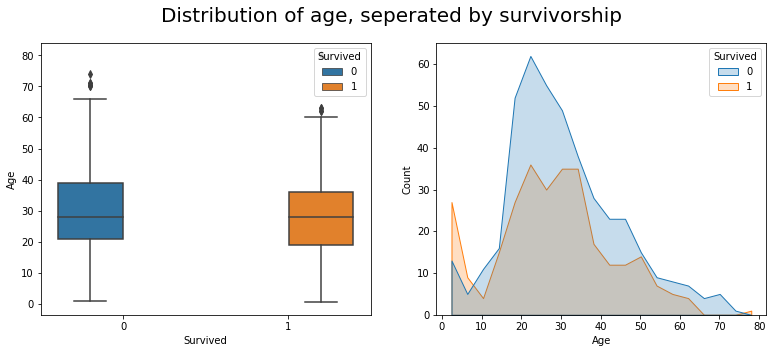

In [27]:
# distribution of age
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
fig.suptitle('Distribution of age, seperated by survivorship',size=20)
plot_1 = sns.boxplot(x='Survived',y='Age',hue='Survived',data=train,ax=axes[0])
sns.move_legend(plot_1,loc='upper right', title = 'Survived')
plot_2 = sns.histplot(data=train,x='Age',ax=axes[1],hue='Survived',element="poly")

In [28]:
# is younger people likely to survive? 

mortality_subset = train[train['Survived']==0]['Age']
survived_subset = train[train['Survived']==1]['Age']

In [29]:
mortality_subset.shape

(549,)

In [30]:
survived_subset.shape

(342,)

In [31]:
from scipy.stats import ttest_ind
tstat, t_p_value = ttest_ind(a=mortality_subset,b=survived_subset,nan_policy='omit')

In [32]:
t_p_value

0.03912465401348249

In [33]:
# 96%+ when sampled, any surviors are younger than any deceased. 
# younger passengers are more likely to survive Titanic

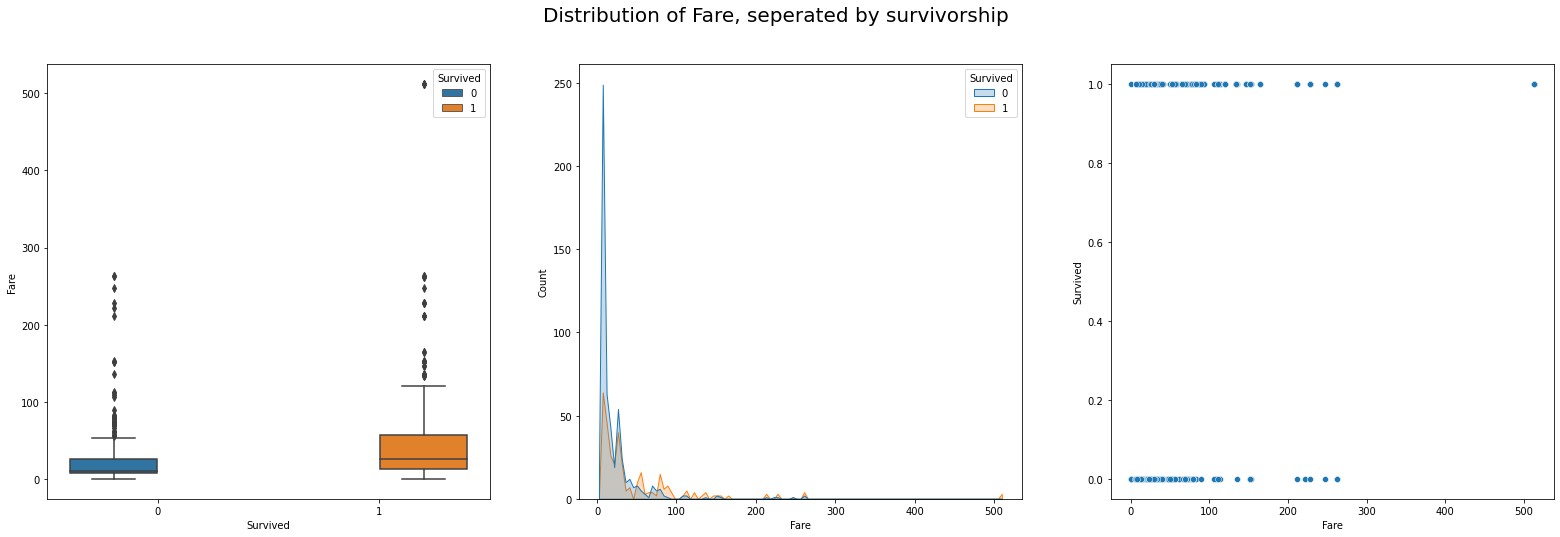

In [34]:
# distribution of Fare
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(27,8))
fig.suptitle('Distribution of Fare, seperated by survivorship', size = 20)
plot_3 = sns.boxplot(x='Survived',y='Fare',hue='Survived',data=train,ax=axes[0])
sns.move_legend(plot_3,loc='upper right', title = 'Survived')
plot_4 = sns.histplot(data=train,x='Fare',ax=axes[1],hue='Survived',element="poly")
plot_5 = sns.scatterplot(x=train['Fare'],y =train['Survived'],ax=axes[2])

In [35]:
train[train['Fare']>400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr


In [36]:
train[train['Fare']>200].count()

PassengerId    20
Survived       20
Pclass         20
Name           20
Sex            20
Age            18
SibSp          20
Parch          20
Ticket         20
Fare           20
Cabin          17
Embarked       20
Title          20
dtype: int64

In [37]:
# drop fare>200 outliers
# drop 5% of records to stat test
train_eda_1 = train.copy()
train_eda_1.drop(train[train['Fare']>200].index, inplace=True)

In [38]:
train_eda_1.shape

(871, 13)

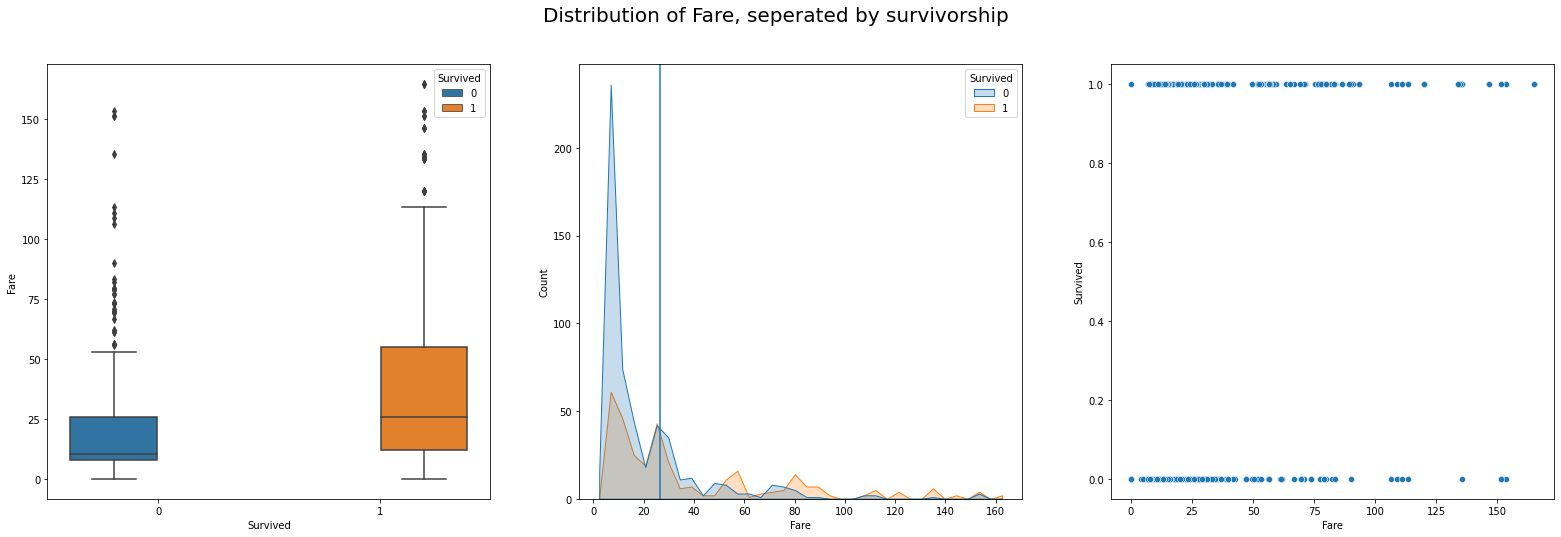

In [39]:
# distribution of Fare
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(27,8))
fig.suptitle('Distribution of Fare, seperated by survivorship', size = 20)
plot_3_drop = sns.boxplot(x='Survived',y='Fare',hue='Survived',data=train_eda_1,ax=axes[0])
sns.move_legend(plot_3_drop,loc='upper right', title = 'Survived')
plot_4_drop = sns.histplot(data=train_eda_1,x='Fare',ax=axes[1],hue='Survived',element="poly")
line = axes[1].axvline(train_eda_1['Fare'].mean())
plot_5_drop = sns.scatterplot(x=train_eda_1['Fare'],y =train_eda_1['Survived'],ax=axes[2])

In [40]:
# Mann-Whitney test
# H0: the fare median of survived and deceased are equal 

In [41]:
fare_of_survived = train_eda_1[train_eda_1['Survived']==1]['Fare']
fare_of_deceased = train_eda_1[train_eda_1['Survived']==0]['Fare']

In [42]:
from scipy.stats import mannwhitneyu as mwu
ustat,pvalue = mwu(x=fare_of_survived,y=fare_of_deceased)

In [43]:
pvalue

2.3578865601249142e-20

In [44]:
# those who survived paid higher for tickets than those who deceased 

In [45]:
# explore family

sibsp = [i for i in train['SibSp']]
parch = [j for j in train['Parch']]
family = [i+j for i,j in zip(sibsp,parch)]
train['Family'] = family
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


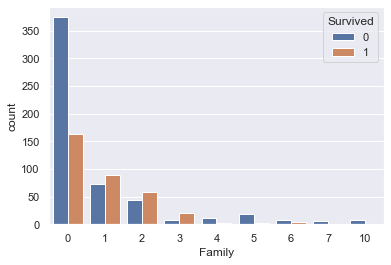

In [46]:
sns.set(font_scale=1)

plot_6 = sns.countplot(x='Family', data=train, hue='Survived')
plot_6.legend(fontsize=50)
sns.move_legend(plot_6,loc='upper right', title = 'Survived')

In [47]:
# find out survival probability against family members
train.groupby('Family')['Survived'].value_counts()

Family  Survived
0       0           374
        1           163
1       1            89
        0            72
2       1            59
        0            43
3       1            21
        0             8
4       0            12
        1             3
5       0            19
        1             3
6       0             8
        1             4
7       0             6
10      0             7
Name: Survived, dtype: int64

In [48]:
plot_7_y= list(train.groupby('Family')['Survived'].value_counts())
plot_7_y

[374, 163, 89, 72, 59, 43, 21, 8, 12, 3, 19, 3, 8, 4, 6, 7]

In [49]:
# hard code
plot_7_family = [0,0,1,1,2,2,3,3,4,4,5,5,6,6,7,10]
plot_7_survived = [0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,0]

plot_7_df = pd.DataFrame()
plot_7_df['count'] = plot_7_y
plot_7_df['family'] = plot_7_family
plot_7_df['survived'] = plot_7_survived

plot_7_df.head()

,count,family,survived
0,374,0,0
1,163,0,1
2,89,1,1
3,72,1,0
4,59,2,1


<AxesSubplot:xlabel='family', ylabel='count'>

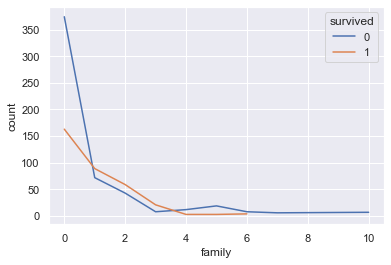

In [50]:

sns.lineplot(x='family', y='count', hue='survived',data=plot_7_df)

In [51]:
# similar trend. no use to add to the dataset

## 3. feature engineering and feature selection

In [52]:
# go back to raw data to create checkpoint
train_2 = train_raw.copy()
test_2 = test_raw.copy()

In [53]:
# drop Ticket, Cabin, Name(after extracting Title), PassengerId

In [54]:
train_2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [55]:
train_2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
test_2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [57]:
train_2.drop(['Ticket','Cabin', 'PassengerId'],axis=1, inplace=True)
test_2.drop(['Ticket','Cabin','PassengerId'],axis=1, inplace=True)

In [58]:
# pool titles into Mr, Mrs, Miss and Master
# replace titles (column) with these 4 categories
# drop Name

'''
['Rev','Don','Mr','Miss','Major','Mme','Lady','Dr','Mlle','Col',
'the Countess','Mrs','Jonkheer','Sir','Master','Capt','Ms']
'''

def title_generator(df):
    names = df['Name']
    title_col = []
    for name in names:
        t = name.split(sep=',')[1]
        t = t[1:]
        t = t[0:t.find('.')]
        title_col.append(t)
    return title_col

train_2['Title'] = title_generator(train_2)
train_2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [59]:
test_2['Title'] = title_generator(test_2)
test_2.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Mr
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Mr
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Mrs


In [60]:
# group all non common titles to rare group
def replace_titles(df):
    title=df['Title']
    if title in ['Lady', 'Countess','Capt', 'Col','Don', 
                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona','the Countess']:
        return 'Rare'
    elif title in ['Mme','Lady']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if df['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [61]:
train_2['Title']=train_2.apply(replace_titles, axis=1)

In [62]:
test_2['Title']=test_2.apply(replace_titles, axis=1)

In [63]:
train_2['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [64]:
# filling missing age with mean age of groups inferred from titles

# mean age per title group
mean_age_per_title = train_2.groupby('Title')['Age'].mean()
mean_age_per_title

Title
Master     4.574167
Miss      21.845638
Mr        32.368090
Mrs       35.788991
Rare      45.545455
Name: Age, dtype: float64

In [65]:
mean_age_per_title = train_2.groupby('Title')['Age'].mean().tolist()
mean_age_per_title

[4.574166666666667,
 21.845637583892618,
 32.368090452261306,
 35.788990825688074,
 45.54545454545455]

In [66]:
titles_list = ['Master','Miss','Mr','Mrs','Rare']

In [67]:
i=0
for i in range(len(titles_list)):
    train_2.loc[(train_2['Age'].isnull()) & (train_2['Title']==titles_list[i]), 'Age']=mean_age_per_title[i]

In [68]:
train_2.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

In [69]:
# remove name column 
train_2.drop(['Name'],inplace=True, axis=1)
test_2.drop(['Name'],inplace=True, axis=1)

In [70]:
# replace missing values in age col with mean age 
age_mean_train = train_2['Age'].mean()
train_2['Age'].fillna(value=age_mean_train, inplace=True)
age_mean_test = test_2['Age'].mean()
test_2['Age'].fillna(value=age_mean_test, inplace=True)

In [71]:
# categorical columns: one hot encoded
# sex 
# Embarked
# title

In [72]:
train_3= train_2.copy()
test_3 = test_2.copy()

In [73]:
# transform Sex
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
train_3['Sex']= lb.fit_transform(train_3['Sex'])
train_3['Sex'].unique()

array([1, 0])

In [74]:
test_3['Sex']= lb.fit_transform(test_3['Sex'])
test_3['Sex'].unique()

array([1, 0])

In [75]:
# transform Embarked
lb = preprocessing.LabelEncoder()
train_3['Embarked']= lb.fit_transform(train_3['Embarked'])
train_3['Embarked'].unique()

array([2, 0, 1, 3])

In [76]:
test_3['Embarked']= lb.fit_transform(test_3['Embarked'])
test_3['Embarked'].unique()

array([1, 2, 0])

In [77]:
# transform Title
lb = preprocessing.LabelEncoder()
train_3['Title']= lb.fit_transform(train_3['Title'])
train_3['Title'].unique()

array([2, 3, 1, 0, 4])

In [78]:
test_3['Title']= lb.fit_transform(test_3['Title'])
test_3['Title'].unique()

array([2, 3, 1, 0, 4])

In [79]:
train_3.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.759451,0.523008,0.381594,32.204208,1.538721,1.895623
std,0.486592,0.836071,0.477990,13.278693,1.102743,0.806057,49.693429,0.794231,0.788465
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.845638,0.000000,0.000000,7.910400,1.000000,1.000000
50%,0.000000,3.000000,1.000000,30.000000,0.000000,0.000000,14.454200,2.000000,2.000000
75%,1.000000,3.000000,1.000000,35.788991,1.000000,0.000000,31.000000,2.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,4.000000


In [80]:
# feature selection for continous variables with correlation matrix

# correlation matrix has not much meaning for categorical variables: Embarked, Title
# but it is a good visualization tool to inspect multicollinearity

In [81]:
corr_matrix = train_3.corr(method='kendall')
# kendall can be used for non parametric params; for both continous and ordinal variables

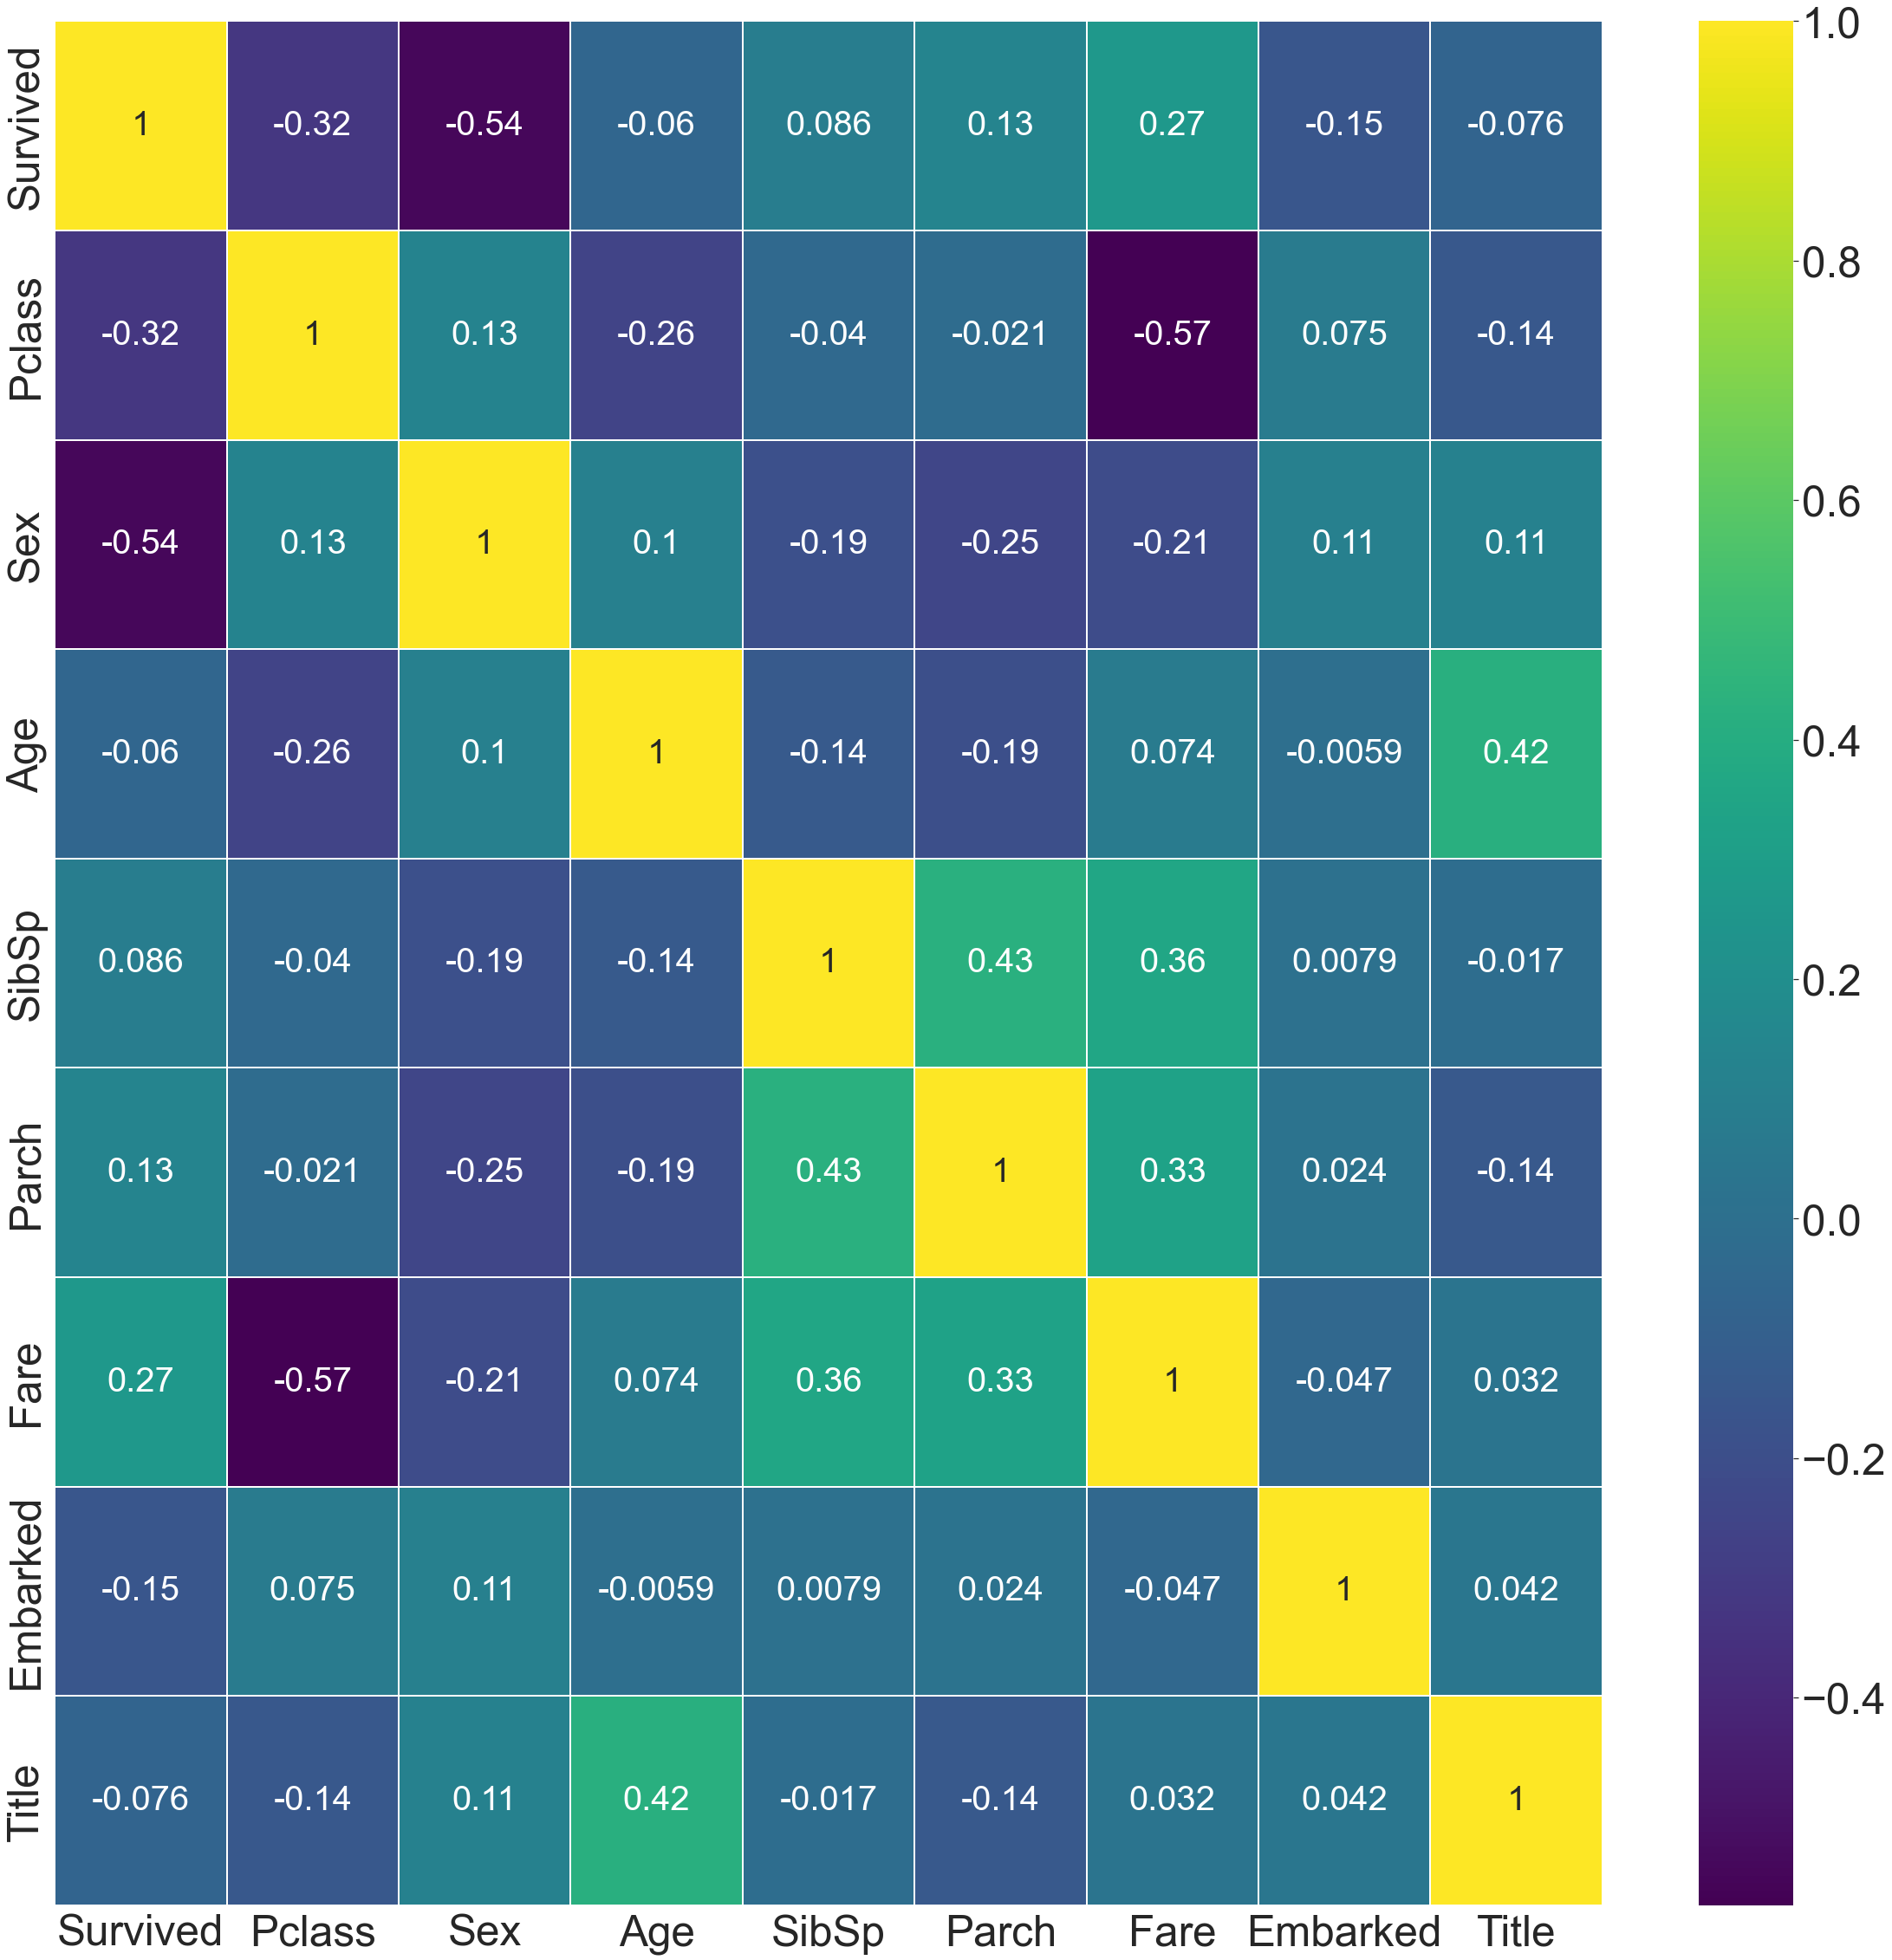

In [82]:
# visualize correlation
plt.figure(figsize=(40,40))
sns.set(font_scale=4.5)
color = plt.get_cmap('viridis').copy()   # default color
color.set_bad('lightblue') 
sns.heatmap(corr_matrix, annot=True, linewidth=0.4,annot_kws={"size": 40}, cmap=color)
plt.savefig('corr_heatmap')
plt.show()

# pay attention to the survived row/column. 
# higher the abs(correlation coefficient) means this feature affects survival more

In [83]:
corr_matrix['Survived']

Survived    1.000000
Pclass     -0.323533
Sex        -0.543351
Age        -0.060307
SibSp       0.085915
Parch       0.133933
Fare        0.266229
Embarked   -0.150419
Title      -0.075597
Name: Survived, dtype: float64

In [84]:
# feature selection with 

from sklearn.feature_selection import SelectKBest, mutual_info_classif


X_train_3 = train_3.iloc[:, 1:]
y_train_3 = train_3['Survived']
mi = mutual_info_classif(X_train_3, y_train_3)
mi = pd.Series(mi)
mi.index = X_train_3.columns
mi.sort_values(ascending= False)

Title       0.172143
Sex         0.135894
Fare        0.132935
Age         0.067989
SibSp       0.048940
Pclass      0.046089
Parch       0.027657
Embarked    0.000000
dtype: float64

<AxesSubplot:>

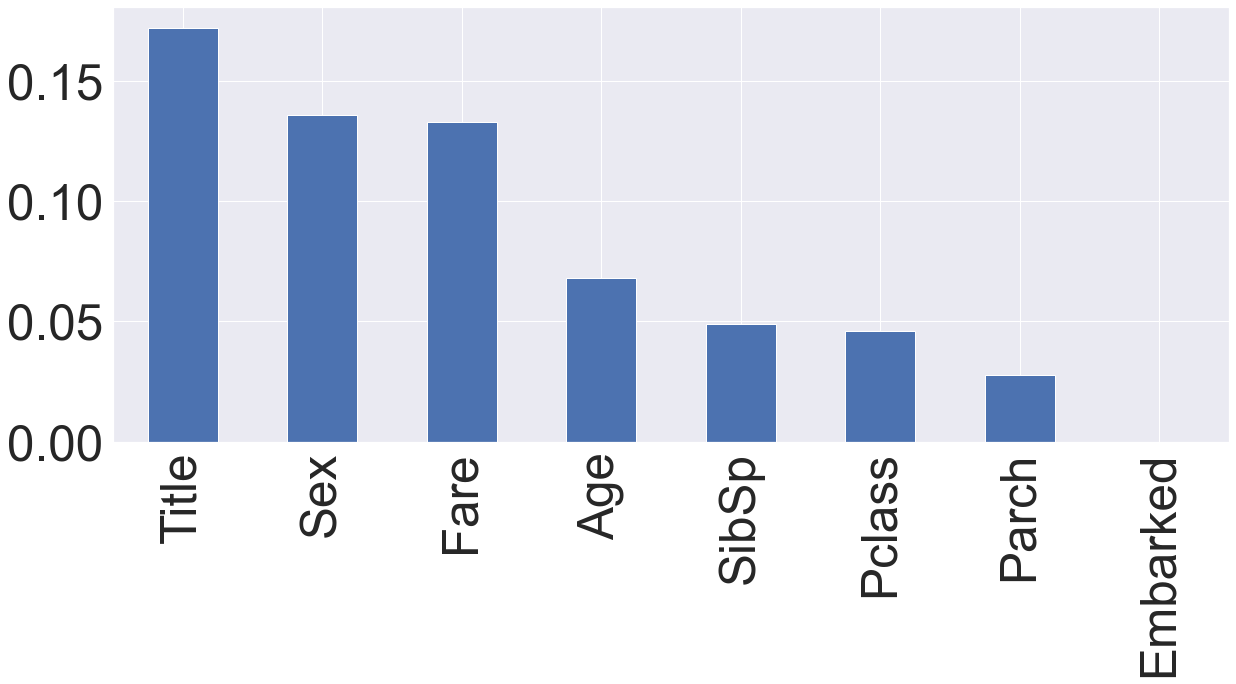

In [85]:
# barplot to rank mutual information gain of each feature to the target

mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [86]:
# select top 5 features 
# dropping columns with low mutual information gain
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=6)
sel_five_cols.fit(X_train_3, y_train_3)
X_train_3.columns[sel_five_cols.get_support()]

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title'], dtype='object')

In [87]:
train_3.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

In [88]:
# dropping columns with low mutual information gain

train_3.drop(['SibSp','Embarked','Parch'], axis=1, inplace=True)
test_3.drop(['SibSp','Embarked','Parch'], axis=1,inplace=True)

In [89]:
# shuffle to make sure
train_4 = train_3.copy()
train_4.head()
from sklearn.utils import shuffle as ushuffle
train_4 = ushuffle(train_4)
train_4.describe()    # should look the same

,Survived,Pclass,Sex,Age,Fare,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.759451,32.204208,1.895623
std,0.486592,0.836071,0.477990,13.278693,49.693429,0.788465
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.845638,7.910400,1.000000
50%,0.000000,3.000000,1.000000,30.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.788991,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,4.000000


In [90]:
train_4.shape

(891, 6)

In [91]:
test_3.shape

(418, 5)

In [92]:
train_4.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Title       0
dtype: int64

In [93]:
test_3.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      1
Title     0
dtype: int64

In [94]:
# sklearn random forest doesnot allow non native nan
test_3['Fare'].fillna(test_3[ 'Fare'].mean() , inplace = True)

## 4. Declare features and targets

In [95]:
X_all_from_train_dataset = train_4.iloc[:, 1:]
y_all_from_train_dataset = train_4['Survived']

In [96]:
X_all_from_train_dataset.head()

,Pclass,Sex,Age,Fare,Title
271,3,1,25.00000,0.0000,2
760,3,1,32.36809,14.5000,2
704,3,1,26.00000,7.8542,2
554,3,0,22.00000,7.7750,1
119,3,0,2.00000,31.2750,1


In [97]:
y_all_from_train_dataset.head()

271    1
760    0
704    0
554    1
119    0
Name: Survived, dtype: int64

## 5. train "test"  split

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_all_from_train_dataset, y_all_from_train_dataset,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle = True)

## 6. Models
* 4.1 Random Forest
* 4.2 XGBoost

In [100]:

from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

def custom_accuracy_set (model, X_train, X_test, y_train, y_test, train=True):
    '''
    fit the model and prints accuracy metric
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    
    
    if train:
        x = X_train
        y = y_train
    elif not train:
        x = X_test
        y = y_test
        
    y_predicted = model.predict(x)
    
    accuracy = accuracy_score(y, y_predicted)
    print('model accuracy: {0:4f}'.format(accuracy))
    oconfusion_matrix = confusion_matrix(y, y_predicted)
    print('Confusion matrix: \n {}'.format(oconfusion_matrix))
    return accuracy

### 6.1 Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier
model_random_forest = RandomForestClassifier(n_estimators=500,
                                             random_state=42,
                                            )
model_random_forest.fit(X_train_split,y_train_split)

RandomForestClassifier(n_estimators=500, random_state=42)

In [102]:
# random forest train accurracy

rf_train_accuracy = custom_accuracy_set(model_random_forest, X_train_split, X_test_split, y_train_split, y_test_split, train=True)

model accuracy: 0.981742
Confusion matrix: 
 [[428   3]
 [ 10 271]]


In [103]:
# random forest test accurracy

rf_test_accuracy = custom_accuracy_set(model_random_forest, X_train_split, X_test_split, y_train_split, y_test_split, train=False)

model accuracy: 0.854749
Confusion matrix: 
 [[109   9]
 [ 17  44]]


## 6.2 XGBoost

In [104]:
import xgboost as xgb

In [105]:
model_xgb = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.2,n_jobs=-1)

In [106]:
model_xgb.fit(X_train_split,y_train_split)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10000, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [107]:
# xgb train accurracy

xgb_train_accuracy = custom_accuracy_set(model_xgb, X_train_split, X_test_split, y_train_split, y_test_split, train=True)

model accuracy: 0.981742
Confusion matrix: 
 [[426   5]
 [  8 273]]


In [108]:
# xgb test accurracy

xgb_test_accuracy = custom_accuracy_set(model_xgb, X_train_split, X_test_split, y_train_split, y_test_split, train=False)

model accuracy: 0.815642
Confusion matrix: 
 [[100  18]
 [ 15  46]]


## 7. export prediction

In [109]:
results = model_random_forest.predict(test_3)

In [110]:
results

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,

In [111]:
export_df = pd.DataFrame()

In [112]:
export_df['PassengerId'] = test_raw['PassengerId']
export_df['Survived'] = results

In [113]:
export_df.to_csv('Survived_4.csv', header=True, index=False)



https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/